In [179]:
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

def arrangements(n, k):
    return int(factorial(n) / factorial(n - k))

def permutations(n):
    return int(factorial(n))

#### 1. Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

In [1]:
sals = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [2]:
# среднее арифместическое
x_ = sum(sals) / len(sals)
x_

73.14285714285714

In [3]:
# дисперсия
m = len(sals)
dis = sum([(i - x_)**2 for i in sals]) / m
dis

2135.074829931973

In [4]:
# среднее квадритичное отклонение
std = dis**(1/2)
std

46.20686994302874

In [5]:
# несмещенная дисперсия
dis_unbias = sum([(i - x_)**2 for i in sals]) / (m-1)
dis_unbias

2241.8285714285716

In [6]:
# проверка


In [7]:
np.mean(sals) == x_

True

In [8]:
# разница минимальна, спишем на особенности алгоритмов :)
np.var(sals) - dis, np.var(sals, ddof=1) - dis_unbias, np.std(sals) - std

(-4.547473508864641e-13, -4.547473508864641e-13, -7.105427357601002e-15)

#### 2.1 Для выборки из задачи 1 найти (также без использования библиотек):
#### 1. медиану, первый и третий квартили, интерквартильное расстояние,

In [9]:
data = sals.copy()
data.sort()

In [70]:
len(data) # 21 элемент
# длина списка нечетная, значит берет средний элемент массива в качестве медианы
mean = data[(len(data) + 1) // 2 - 1] # len дает длину, индекс списка начинается с нуля, поэтому -1 от номера
print(f'Медиана: элемент номер {(len(data) + 1) // 2}, значение {mean}')

Медиана: элемент номер 11, значение 70


In [77]:
# проверим распределение элементов по медиане
sum([1 for i in data if i > mean]), sum([1 for i in data if i < mean])

(10, 10)

In [78]:
# сверим с np.median
print(np.median(data)),
sum([1 for i in data if i > np.median(data)]), sum([1 for i in data if i < np.median(data)])

70.0


(10, 10)

In [132]:
# квартили 1 и 3 (25 и 75)
quart25 = data[((len(data) + 1) // 2 + 1) //2 - 1]
quart25

45

In [125]:
sum([1 for i in data if i < quart25]), sum([1 for i in data if i > quart25])

(5, 15)

In [126]:
# проверяем себя
np.quantile(data, 0.25) == quart25

True

In [140]:
quart75 = data[len(data) - ((len(data) + 1) // 2 + 1) //2] # из длины списка вычитаем длину первого квартиля

In [143]:
quart75 == np.quantile(data, 0.75)

True

In [161]:
# интерквартильный размах, отрезок между между 1 и 3 квартилью
interquartile = [quart25, quart75]
iqr = interquartile[1] - interquartile[0] # для подсчета выбросов считаем расстояние
interquartile

[45, 84]

In [162]:
np.quantile(data, [0.25, 0.75])

array([45., 84.])

#### 2.2 выборсы в выборке (используя для этого метод как при построении "усов" из boxplot)

In [164]:
boxplot_range = (quart25 - 1.5*iqr, quart75 + 1.5*iqr)

In [174]:
boxplot_range

(-13.5, 142.5)

In [177]:
# имеем два выброса
[i for i in data if i > boxplot_range[1] or i < boxplot_range[0]]

[150, 230]

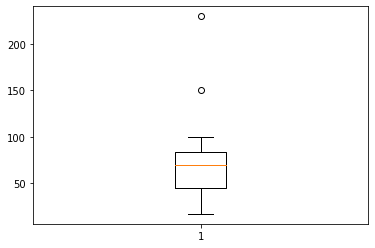

In [178]:
# сверяемся с графиком. Видим два выброса "сверху"
plt.boxplot(data)
plt.show()

#### 3. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

In [186]:
# на А и В находятся по 1/4 от всех студентов, на С 1/2 всех студентов
# вероятность того, что случайный студент сдаст сессию равна
P = 1/4 * 0.8 + 1/4 * 0.7 + 1/2 * 0.9
P

0.825

In [187]:
# вероятность, что это был студент с факультета А равна (остальные факультеты по аналогии)
(1/4 * 0.8) / 0.825

0.24242424242424246

Второй способ. <br>
Обозначим всех студентов за Х. Тогда на А и В факультетах учится по $\frac{X}{4}$ студентов, а на С $\frac{X}{2}$. <br>
Тогда общее количество успешных исходов равно $\frac{X}{4} * 0.8 + \frac{X}{4} * 0.7 + \frac{X}{2} * 0.9 = 0.825*x $ <br>
Соответственно $P(A) = \frac{\frac{X}{4} * 0.8}{0.825*x} = 0.24242424242424246  $

In [190]:
# хотя по сути это и есть первый способ, просто почему-то инстинктивно потянулась рука ввести х. 
# Это дает количество исходов, а с ними проще работать